# Time-Series Analysis using NeuralProphet: Dhaka Tribune

## Highlights

* Dataset: Dhaka Tribune 2021 Dataset.

Author: Sumaia Parveen Shupti

Created on: 07/07/2021

Updated on: 08/02/2021

In [1]:
%matplotlib inline
#!pip install neuralprophet

In [2]:
from collections import defaultdict
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
import pandas as pd
import plotly

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from datetime import datetime, timedelta
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
#import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

%matplotlib inline
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)
import sys
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore')
sys.path.append("../")

### Load & Preprocess Dataset

In [4]:
df = pd.read_csv('../input/dhakatribunecomplete/Dhaka Tribune Complete Data.csv')
df['Accident date'] = pd.to_datetime(df['Accident date'])

df = df[['Accident date', 'Deaths']]
df.columns = ['Period', 'Deaths']
df = df.sort_values(by = 'Period')
df = df.dropna()
df = df.set_index('Period').resample('1W').sum()
df = df.reset_index()
df['Period'] = df['Period'].dt.date
#df['Deaths'] = df['Deaths'].fillna(0)
#df = df.set_index('Period')
df

,Period,Deaths
0,2016-06-26,3.0
1,2016-07-03,0.0
2,2016-07-10,0.0
3,2016-07-17,4.0
4,2016-07-24,0.0
...,...,...
257,2021-05-30,3.0
258,2021-06-06,11.0
259,2021-06-13,8.0
260,2021-06-20,16.0


In [5]:
start_ = df.Period.max()
end_ = df.Period.min()

test_end = df.Period.max()
test_start = df.Period.max() - timedelta(days = 60)

train_end = test_start - timedelta(days = 1)
train_start = train_end - timedelta(days = 365*5)

print('Dataset Start Date: {}'.format(start_))
print('Dataset End Date: {}'.format(end_))
print (' ')
print('Train Set Start Date: {}'.format(train_start))
print('Train Set End Date: {}'.format(train_end))
print (' ')
print('Test Set Start Date: {}'.format(test_start))
print('Test Set End Date: {}'.format(test_end))
print (' ')

Dataset Start Date: 2021-06-27
Dataset End Date: 2016-06-26
 
Train Set Start Date: 2016-04-28
Train Set End Date: 2021-04-27
 
Test Set Start Date: 2021-04-28
Test Set End Date: 2021-06-27
 


In [6]:
mask = (df.Period > train_start) & (df.Period <= train_end)
train = df.loc[mask]
#train = train.drop('Period', 1)
#train = train.drop('Date', 1)

mask = (df.Period >= test_start) & (df.Period <= test_end)
test = df.loc[mask]
#test = test.drop('Period', 1)
#test = test.drop('Date', 1)

In [7]:
train

,Period,Deaths
0,2016-06-26,3.0
1,2016-07-03,0.0
2,2016-07-10,0.0
3,2016-07-17,4.0
4,2016-07-24,0.0
...,...,...
248,2021-03-28,26.0
249,2021-04-04,7.0
250,2021-04-11,4.0
251,2021-04-18,25.0


In [8]:
len(test)

9

In [9]:
test

,Period,Deaths
253,2021-05-02,12.0
254,2021-05-09,11.0
255,2021-05-16,20.0
256,2021-05-23,28.0
257,2021-05-30,3.0
258,2021-06-06,11.0
259,2021-06-13,8.0
260,2021-06-20,16.0
261,2021-06-27,5.0


In [10]:
df.columns = ['ds', 'y']
train.columns = ['ds', 'y']
test.columns = ['ds', 'y']

In [11]:
%%time

from neuralprophet import NeuralProphet
# m = NeuralProphet() # default model
# our model
m = NeuralProphet(
    n_forecasts=9,
    n_lags=9*4,
    #n_changepoints=50,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    batch_size=1,
    epochs=50,
    learning_rate=10, seasonality_mode ='multiplicative'
)
metrics = m.fit(train, freq="7D")  # fit the model using all data
# with cross-validation
# metrics = m.fit(data, 
#                 freq="D",
#                 valid_p=0.2, # validation proportion of data (20%)
#                 epochs=100)

Epoch[50/50]: 100%|██████████| 50/50 [00:17<00:00,  2.91it/s, SmoothL1Loss=0.114, MAE=13.6, RegLoss=0]  

CPU times: user 17.6 s, sys: 137 ms, total: 17.8 s
Wall time: 17.7 s


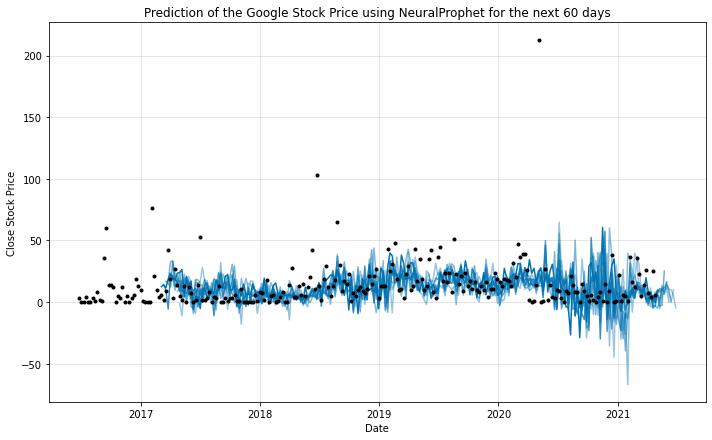

In [12]:
# Predictions
future = m.make_future_dataframe(train, periods=9, n_historic_predictions=len(train)) #we need to specify the number of days in future
prediction = m.predict(future)
# Plotting
forecast = m.plot(prediction)
plt.title("Prediction of the Google Stock Price using NeuralProphet for the next 60 days")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

In [13]:
prediction

,ds,y,yhat1,residual1,yhat2,residual2,yhat3,residual3,yhat4,residual4,...,ar2,ar3,ar4,ar5,ar6,ar7,ar8,ar9,trend,season_yearly
0,2016-06-26,3.0,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,2016-07-03,0.0,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,2016-07-10,0.0,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,2016-07-17,4.0,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,2016-07-24,0.0,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,2021-05-30,NaN,None,NaN,None,NaN,None,NaN,None,NaN,...,None,None,None,23.733232,18.199173,23.77993,20.930719,21.889219,-12.275822,-0.594382
258,2021-06-06,NaN,None,NaN,None,NaN,None,NaN,None,NaN,...,None,None,None,None,8.19322,15.989323,18.324234,18.595949,-12.339377,-0.503244
259,2021-06-13,NaN,None,NaN,None,NaN,None,NaN,None,NaN,...,None,None,None,None,None,9.958384,10.293253,19.574192,-12.402934,-0.318693
260,2021-06-20,NaN,None,NaN,None,NaN,None,NaN,None,NaN,...,None,None,None,None,None,None,21.620607,16.855539,-12.466491,-0.092878


In [14]:
pred = list(prediction.yhat9[len(train):])

comparison = pd.DataFrame()
comparison['Actual'] = test.y
comparison['Prediction'] = pred
comparison['Prediction'] = round(comparison['Prediction'])
comparison

,Actual,Prediction
253,12.0,9.0
254,11.0,8.0
255,20.0,10.0
256,28.0,13.0
257,3.0,15.0
258,11.0,10.0
259,8.0,10.0
260,16.0,5.0
261,5.0,-5.0


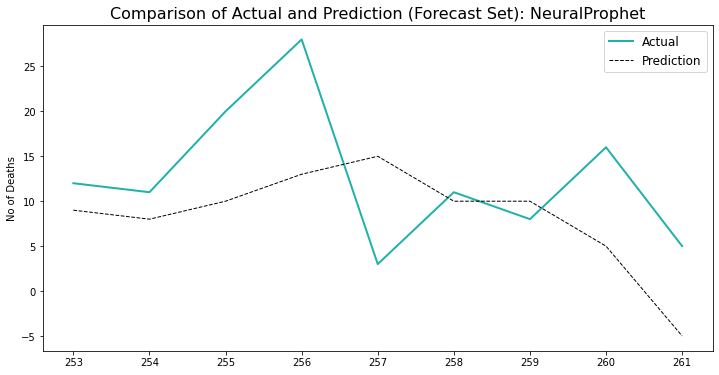

In [15]:
plt.rcParams["figure.figsize"] = [12, 6]

comparison['Actual'].plot(linewidth = 2, label = 'Actual', color = 'lightseagreen')
comparison['Prediction'].plot(linewidth = 1, label = 'Prediction', color = 'black', linestyle = '--')
plt.legend(fontsize = 'large')
plt.ylabel('No of Deaths')
plt.title('Comparison of Actual and Prediction (Forecast Set): NeuralProphet', fontsize = 16)
plt.show()

In [16]:
def evaluation_metrics(actual, prediction):
    
    # Define a function to calculate MAE and RMSE
    from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
    from sklearn.metrics import r2_score

    errors = actual - prediction
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    mape = np.abs(errors/actual).mean() * 100
    r2 = r2_score(actual, prediction)
    
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Mean Squared Error: {:.4f}'.format(mse))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('Mean Absolute Percentage Error: {:.4f}'.format(mape))
    print('R2 Score: {:.4f}'.format(r2))

In [17]:
evaluation_metrics(comparison['Actual'], comparison['Prediction'])

Mean Absolute Error: 7.4444
Mean Squared Error: 79.2222
Root Mean Square Error: 8.9007
Mean Absolute Percentage Error: 95.4095
R2 Score: -0.4854


## Reference

* https://medium.com/innerdoc/6-nlp-tasks-for-training-data-generation-f7d62d1eca3a